In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [14]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
msmt=base.classes.measurement
stn=base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
session.query(msmt.date).order_by(msmt.date.desc()).first()

('2017-08-23',)

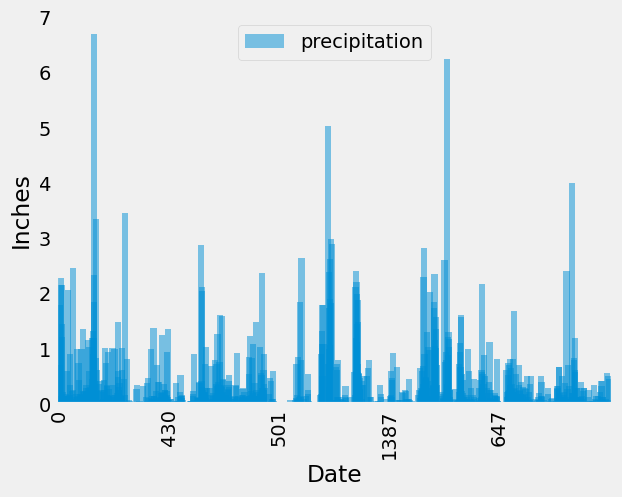

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year=session.query(msmt.date,msmt.prcp).\
    filter(msmt.date <= '2017-08-23').filter(msmt.date >= '2016-08-23').all()

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
year=session.query(msmt.date,msmt.prcp).\
    filter(msmt.date <= '2017-08-23').filter(msmt.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcpDf=pd.DataFrame(year)
prcpDf=prcpDf.rename(columns={"prcp":"precipitation"})

# Sort the dataframe by date
prcpDf=prcpDf.sort_values(by='date',ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcpDf.plot(kind='bar',alpha=.5,width=25,grid=False)
#prcpDf.set_index('date')
plt.locator_params(axis='x',nbins=5)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcpDf.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(func.distinct(stn.name))).all()


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
mostActive=session.query(msmt.station,
    func.count(msmt.station)).group_by(msmt.station).\
    order_by(func.count(msmt.station).desc()).all()
mostActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
mostestActive=session.query(msmt.station,msmt.tobs).\
    filter(msmt.station=='USC00519281').all()
mostestActive

[('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 74.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 76.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 70.0),
 ('USC00519281', 75.0),
 ('USC00519281', 64.0),
 ('USC00519281', 60.0),
 ('USC00519281', 61.0),
 ('USC00519281', 68.0),
 ('USC00519281', 64.0),
 ('USC00519281', 66.0),
 ('USC00519281', 67.0),
 ('USC00519281', 70.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 69.0),
 ('USC00519281', 60.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 65.0),
 ('USC00519281', 75.0),
 ('USC00519281', 69.0),
 ('USC00519281', 67.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 72.0),
 ('USC00519281', 67.0),
 ('USC00519281', 65.0),
 ('USC00519281', 64.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 68.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 61.0),
 ('USC00519281',

In [76]:
max(mostestActive)

('USC00519281', 85.0)

In [77]:
min(mostestActive)

('USC00519281', 54.0)

In [100]:
# having a heck of a time getting the mean of the temps...
avg=session.query(msmt.station,msmt.tobs).\
    filter(msmt.station=='USC00519281'),func.avg(msmt.tobs)
avg

(<sqlalchemy.orm.query.Query at 0x7f9d0dc4ce80>,
 <sqlalchemy.sql.functions.Function at 0x7f9d0dc4d7e0; avg>)

In [103]:
session.query(msmt.station).\
    filter(msmt.station=='USC00519281').\
    order_by(func.avg(msmt.tobs).desc()).all()

OperationalError: (sqlite3.OperationalError) misuse of aggregate: avg()
[SQL: SELECT measurement.station AS measurement_station 
FROM measurement 
WHERE measurement.station = ? ORDER BY avg(measurement.tobs) DESC]
[parameters: ('USC00519281',)]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# see above, got min & max to work

[(54.0, 85.0, 71.66378066378067)]

In [96]:
mostestActive.plot(kind='bar')
mostestActive.drop_index(inplace=True)
mostestActive.show()

AttributeError: 'list' object has no attribute 'plot'

Text(0.5, 4.183333333333314, 'Temperature')

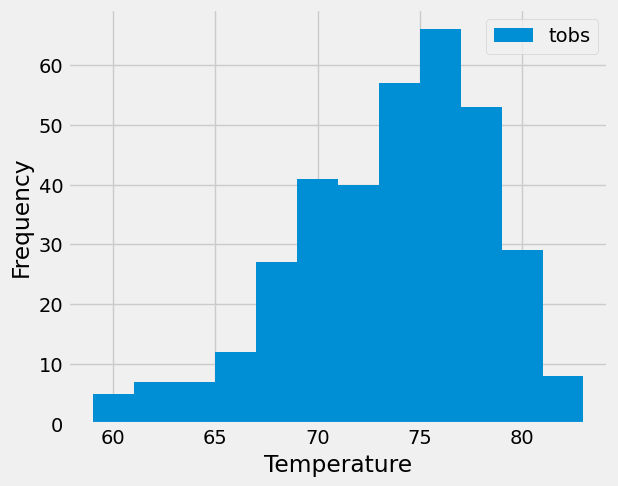

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [97]:
# Close Session
session.close()